<a href="https://colab.research.google.com/github/Kzamudioq/IA/blob/main/Object_Detection_Template_Matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
# Función para cargar y preprocesar la plantilla
def load_and_preprocess_template(template_path):
    """
    Carga y preprocesa la plantilla utilizada para la detección de objetos.

    Args:
        template_path (str): Ruta del archivo de la plantilla.

    Returns:
        tuple: Tupla que contiene la imagen de bordes de la plantilla y su tamaño.
    """
    template = cv2.imread(template_path)
    template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    template_edges = cv2.Canny(template_gray, 50, 200)
    return template_edges, template.shape[:2]


In [3]:
# Función para realizar la detección de objetos en diferentes escalas
def object_detection(image_path, template_edges, template_size, confidence_threshold=70):
    """
    Realiza la detección de objetos en una imagen utilizando la técnica de 'template matching'.

    Args:
        image_path (str): Ruta del archivo de la imagen.
        template_edges (numpy.ndarray): Imagen de bordes de la plantilla.
        template_size (tuple): Tamaño de la plantilla.
        confidence_threshold (int, optional): Umbral de confianza para considerar una detección válida. Por defecto es 70.

    Returns:
        tuple or None: Coordenadas de la detección (si es válida) o None.
    """
    image = cv2.imread(image_path)
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    found = None

    for scale in np.linspace(0.2, 1, 20)[::-1]:
        resized = imutils.resize(image_gray, width=int(image_gray.shape[1] * scale))
        ratio = image_gray.shape[1] / float(resized.shape[1])

        if resized.shape[0] < template_size[0] or resized.shape[1] < template_size[1]:
            break

        edged = cv2.Canny(resized, 50, 200)
        result = cv2.matchTemplate(edged, template_edges, cv2.TM_CCOEFF)
        _, _, _, max_loc = cv2.minMaxLoc(result)

        if found is None or np.max(result) > np.max(found[0]):
            found = (result, max_loc, ratio)

    if found is not None and np.max(found[0]) >= confidence_threshold:
        _, max_loc, ratio = found
        x_start, y_start = int(max_loc[0] * ratio), int(max_loc[1] * ratio)
        x_end, y_end = int((max_loc[0] + template_size[1]) * ratio), int((max_loc[1] + template_size[0]) * ratio)
        return x_start, y_start, x_end, y_end
    else:
        return None


In [4]:
# Función para visualizar el resultado
def visualize_result(image, x_start, y_start, x_end, y_end):
    """
    Visualiza el resultado de la detección dibujando un rectángulo alrededor del objeto detectado.

    Args:
        image (numpy.ndarray): Imagen original.
        x_start, y_start, x_end, y_end (int): Coordenadas del rectángulo de detección.
    """
    cv2.rectangle(image, (x_start, y_start), (x_end, y_end), (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


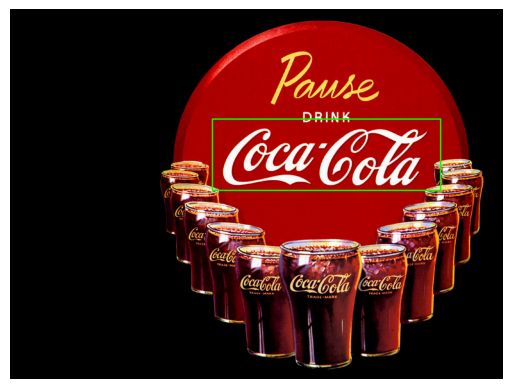

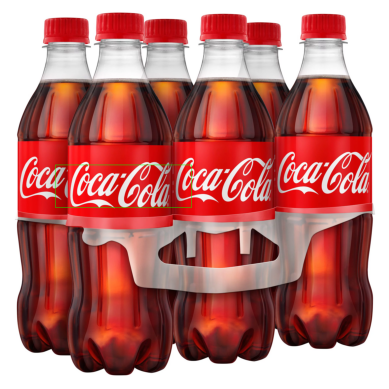

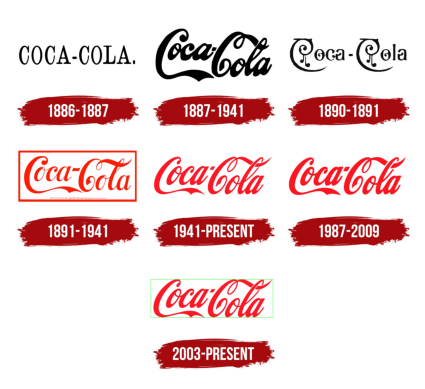

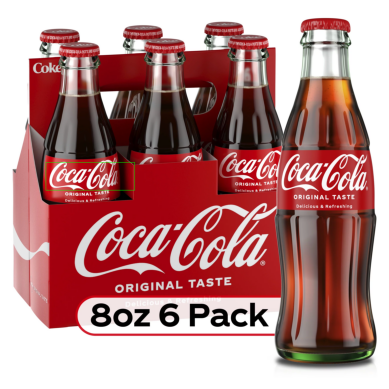

No se encontró una coincidencia en coca cola 4.jpg con el umbral especificado.


In [5]:
# Ruta de la carpeta que contiene las imágenes
carpeta_imagenes = '/content/Cocacola'

# Rutas de archivos para la plantilla
template_path = '/content/Template/Template.jpg'
template_edges, template_size = load_and_preprocess_template(template_path)

# Iteramos sobre todas las imágenes en la carpeta
for filename in os.listdir(carpeta_imagenes):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        image_path = os.path.join(carpeta_imagenes, filename)
        result = object_detection(image_path, template_edges, template_size, confidence_threshold=80)

        if result:
            x_start, y_start, x_end, y_end = result
            image = cv2.imread(image_path)
            visualize_result(image, x_start, y_start, x_end, y_end)
        else:
            print(f"No se encontró una coincidencia en {filename} con el umbral especificado.")
